This is a notebook which organizes various tips and contents of matplotlib which we browse every day.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

# for visualization samples
import pandas as pd

netflix_titles = pd.read_csv(r"C:\Users\ADMIN\Desktop\netflix_titles.csv")

Matplotlib Version : 3.7.0
Seaborn Version : 0.12.2


## 0. Setting

Set the resolution through the dpi (Dots per Inch) setting of the figure. matplotlib has a low default resolution itself, so setting this up is a bit more professional.

plt.rcParams['figure.dpi'] = 200 or dpi=200

And for every plot set figsize. The graph gives a very different feeling depending on the ratio. (I think it's best to try this heuristic multiple times.)

There are many places in matplotlib where you can write titles based on objects such as plt.title (), ax.set_title (), fig.suptitle(). If you add a title that takes into account font size and font family, fontweight, position, etc., it will be more readable.

In [2]:
plt.rcParams['figure.dpi'] = 200

## 1.Alignments

The first nine graph plots (3 by 3) are a combination of matplotlib layout and design.

subplots
subplot2grid
add_axes
gridspec, add_subplot
inset_axes
make_axes_locatable
Two or more graphs are much more visually and semantically better than just one.

The easiest way to do this is to place the rectangles of the same shape.

Usually you can start with the initial size with subplots.

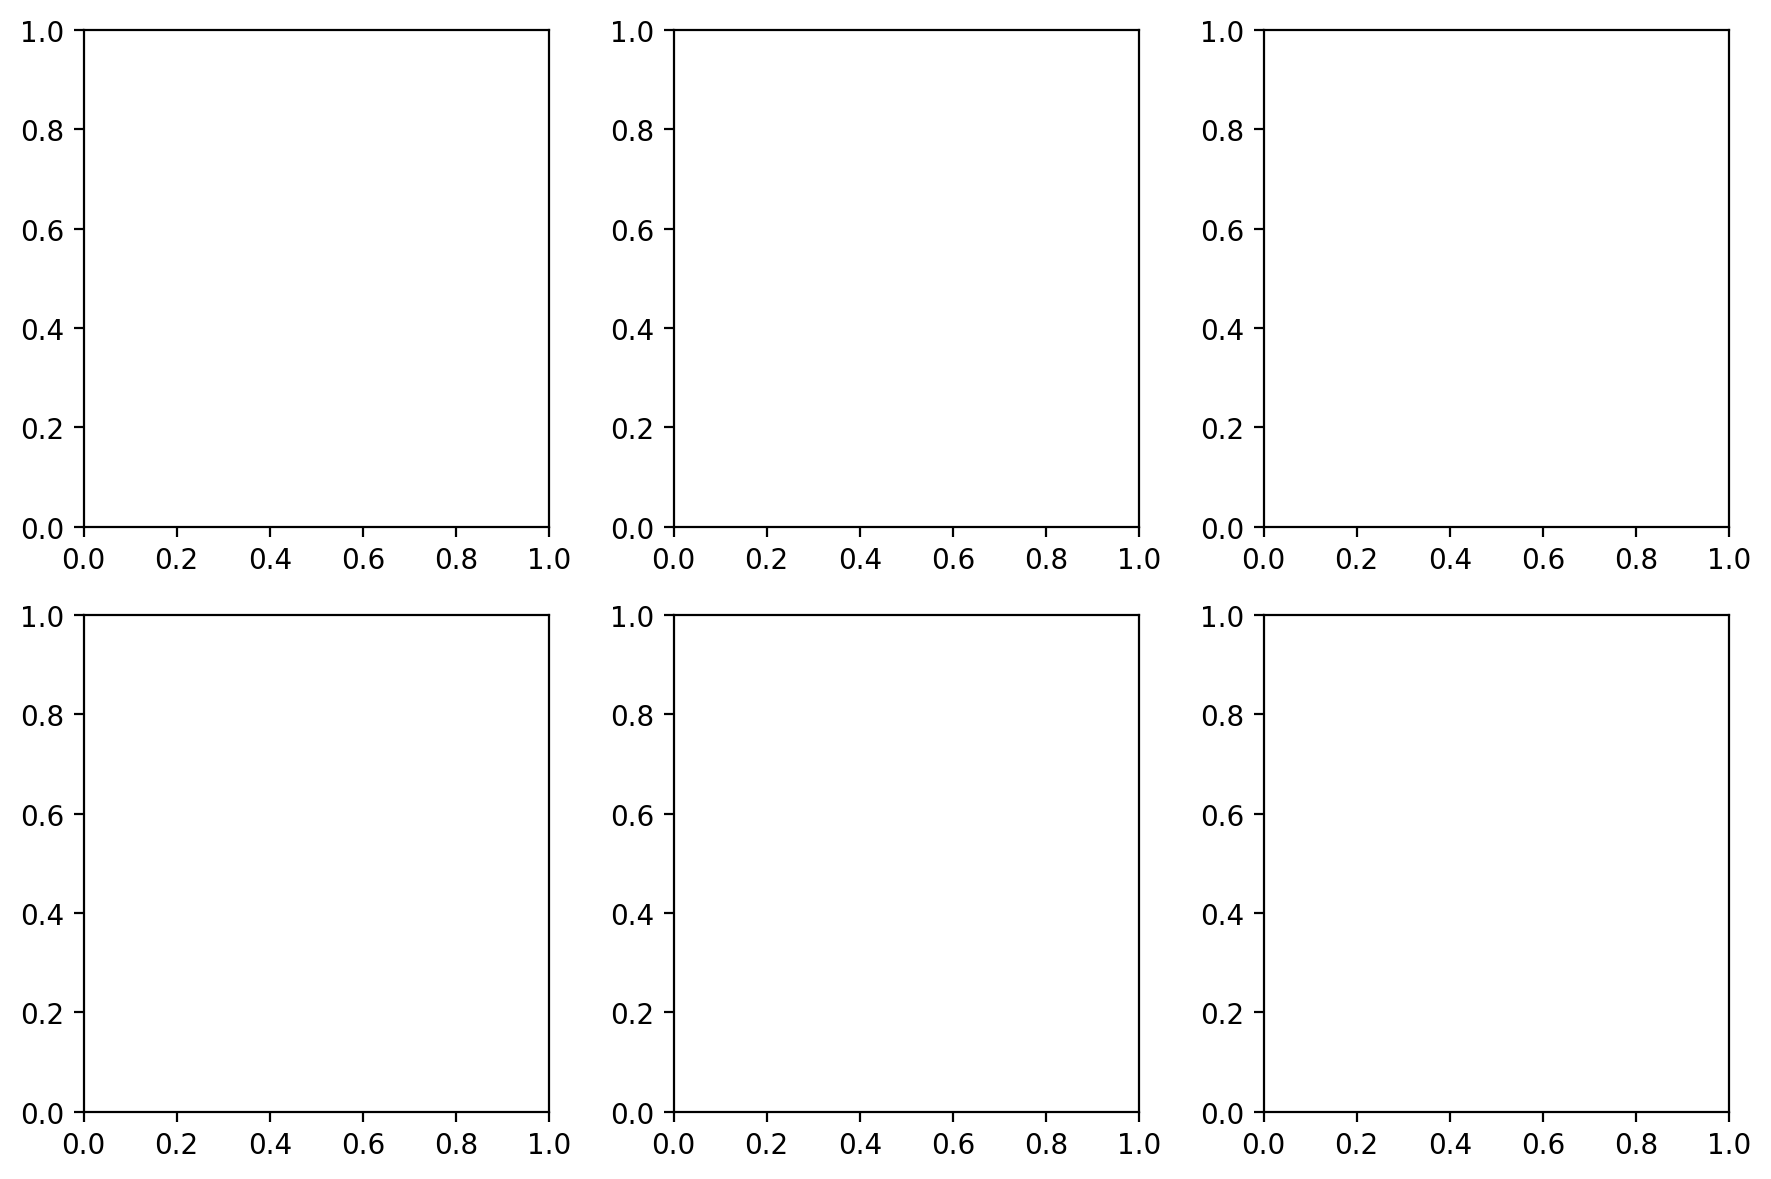

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
plt.tight_layout()
plt.show()

The first of the plt.subplot() parameters specifies the number of rows and the second the number of columns. The graph looks a bit frustrating. In this case, you can use plt.tight_layout() to solve the frustration.

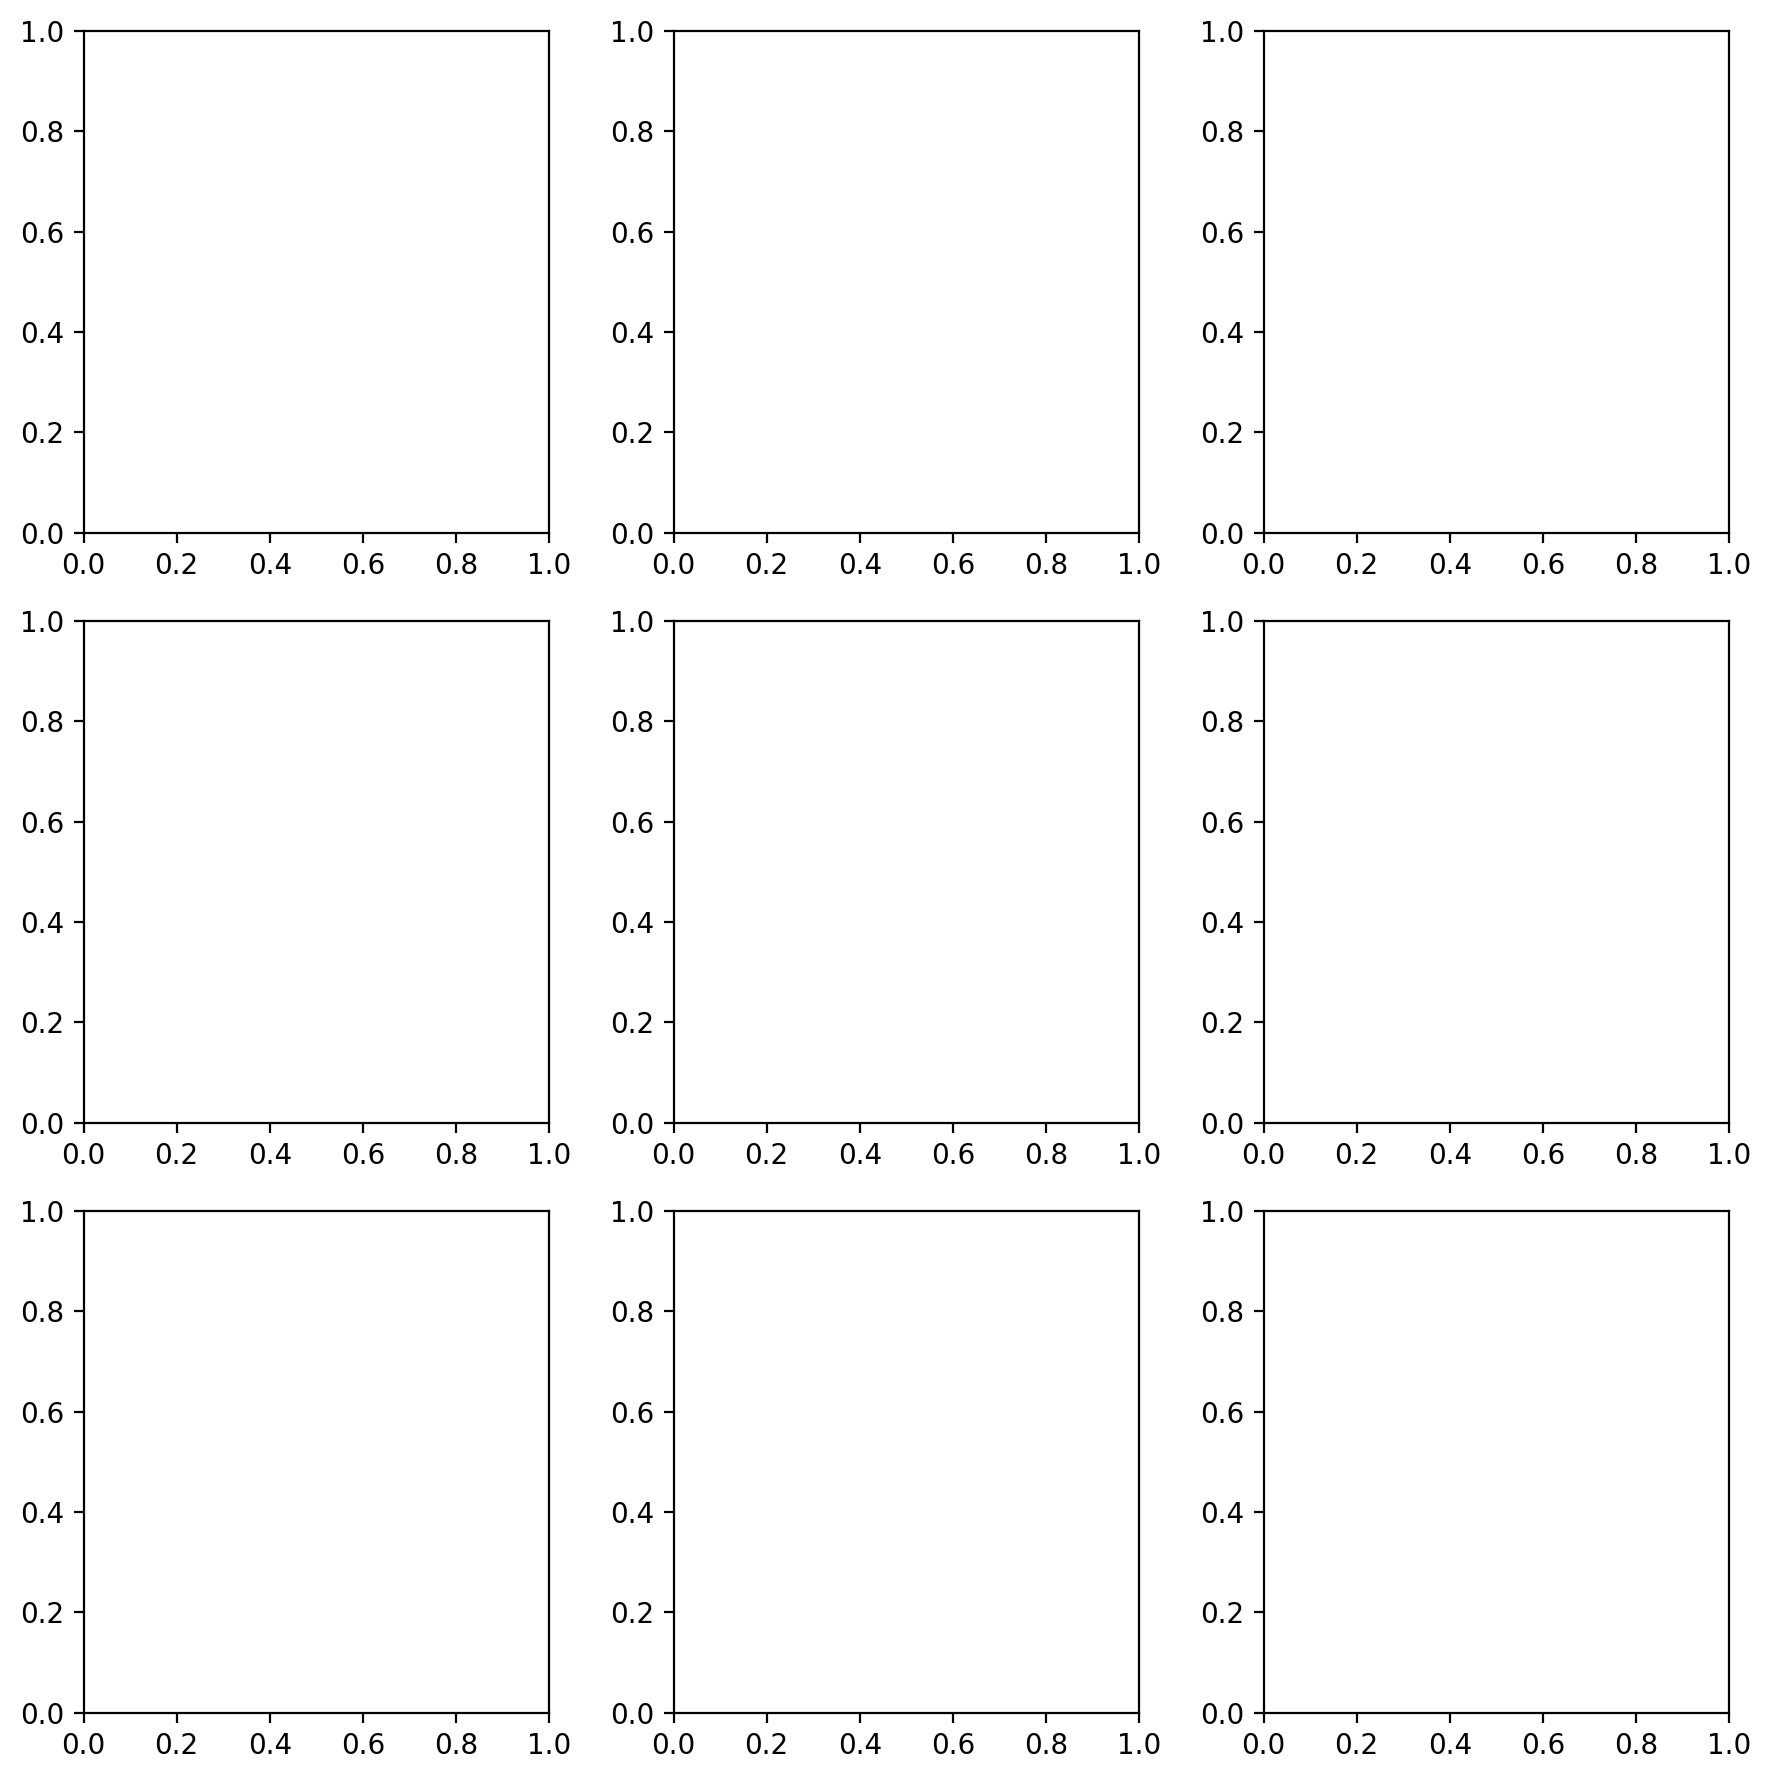

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
plt.tight_layout()
plt.show()

But should it be the same size depending on the subplot? For example, bar graphs and pie charts are often very different in ratio.

In this case, the layout should be different.

In this case, you can easily use the grid system using plt.subplot2grid

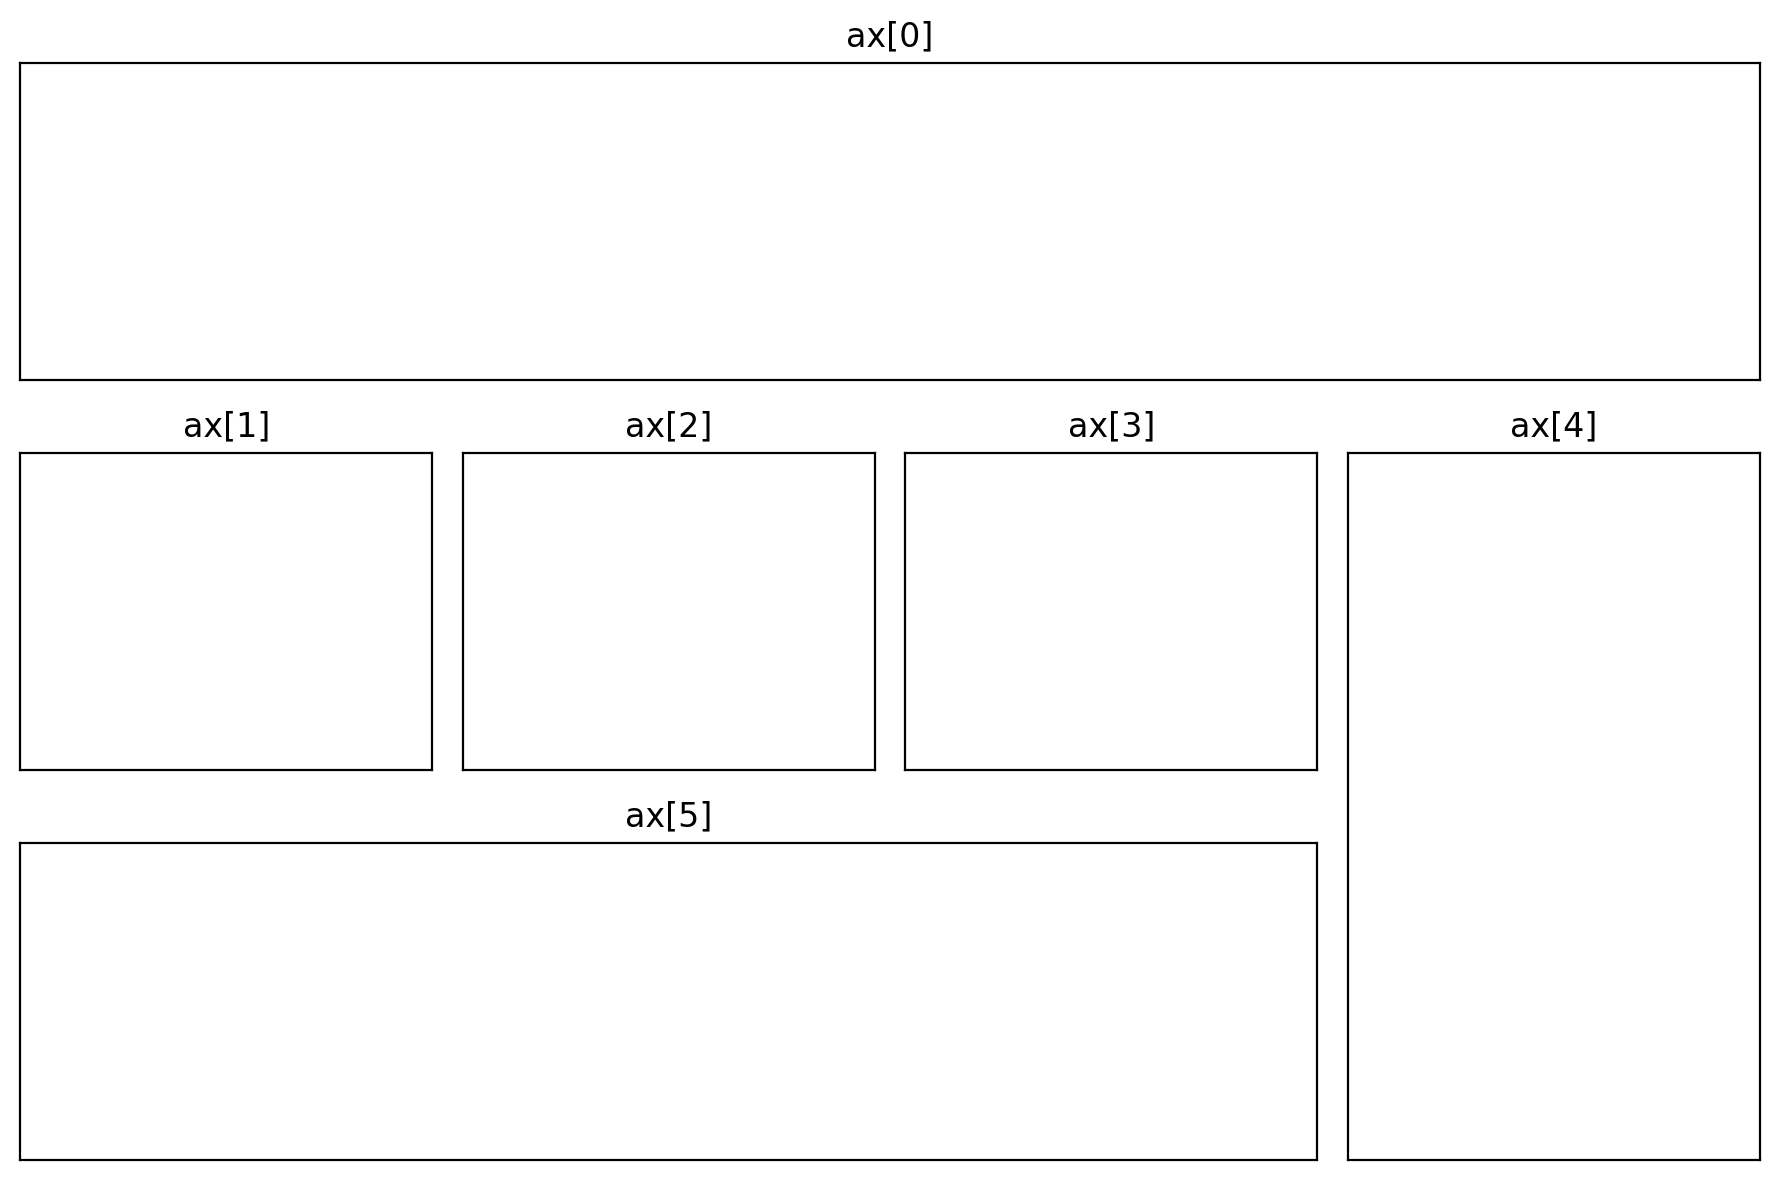

In [10]:
# with subplot2grid

fig = plt.figure(figsize=(9, 6)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)


for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish:)
    ax[ix].set_xticks([]) # to remove x ticks
    ax[ix].set_yticks([]) # to remove y ticks
    
fig.tight_layout()
plt.show()

Alternatively, you can use plt.add_axes() to create an ax where you want.

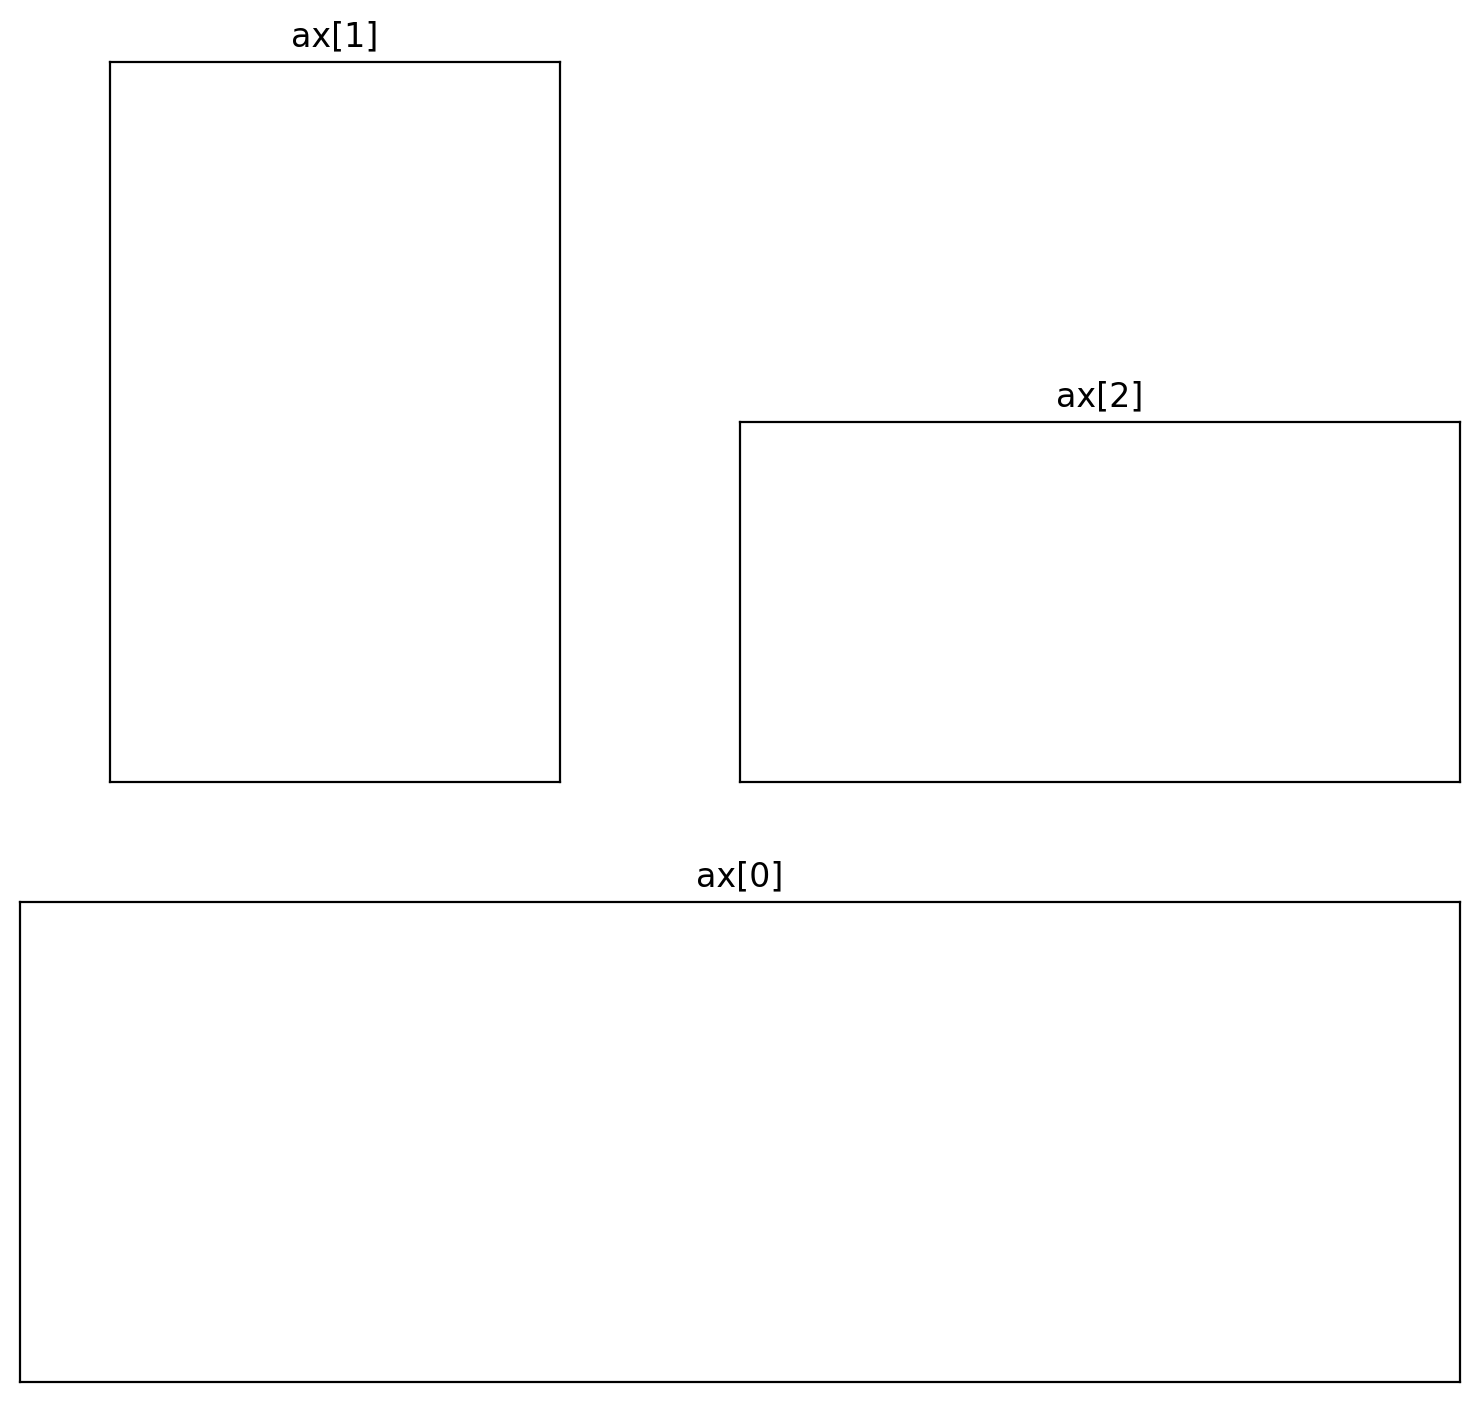

In [12]:
fig = plt.figure(figsize=(9, 6))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.show()

Another way is to use gridspec. This allows you to use add_subplot together, similar to subplots to grid.

This approach allows you to take advantage of the concept of list to use a developer-friendly grid.

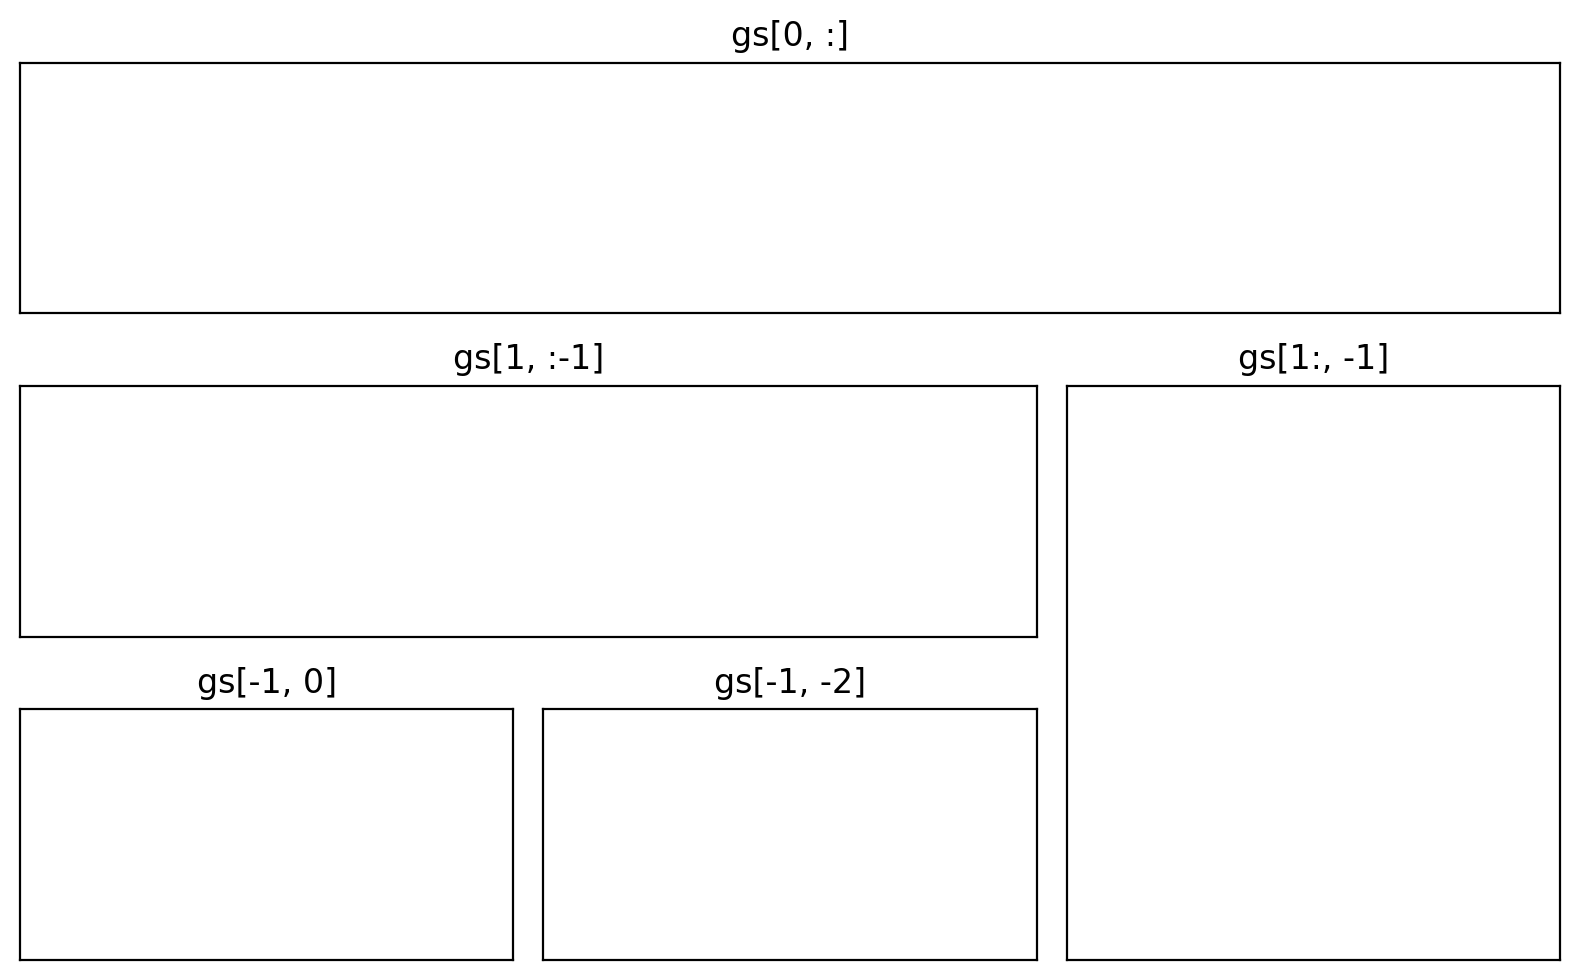

In [13]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

Here you can change the color of ax or plt itself, such as facecolor, to make it look more dashboard-like.

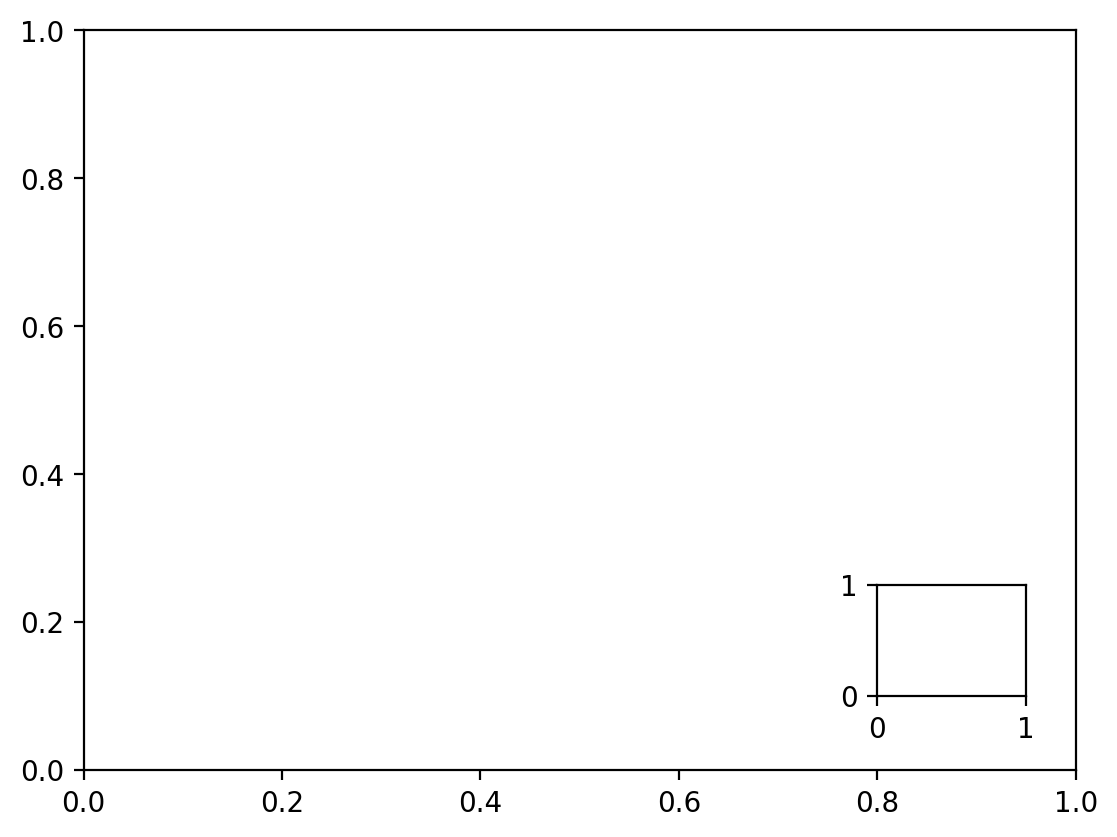

In [14]:
fig, ax = plt.subplots()
axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
plt.show()

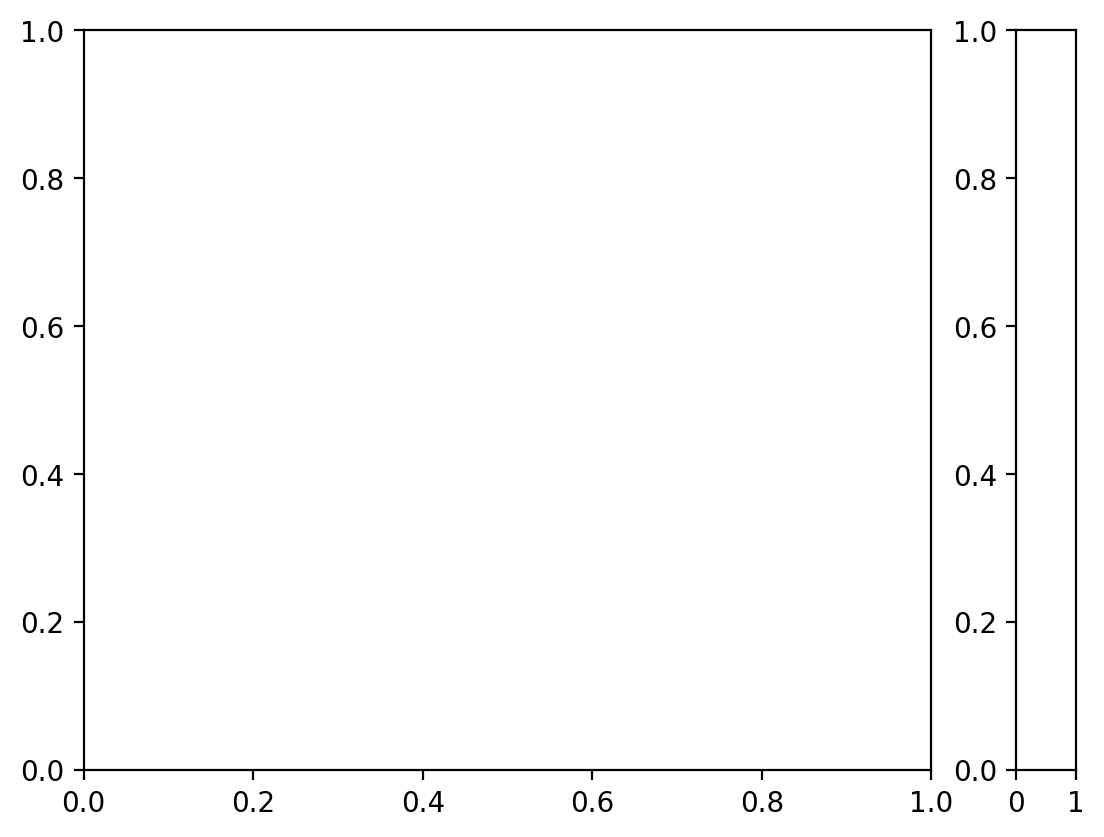

In [17]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes("right", size="7%", pad="10%")
plt.show()

## 2. Colormap

Color is very important in the graph. Of course the matplotlib team has already created a good color palette, and we just need to use it.

diverging
qualitative
sequential
scientific

### Diverging Colormap

This colormap is usually used in visualizations where the median is obvious.

It is usually visualized on a white background, white in the center, and darker in color toward both ends. In other words, the lighter the value, the closer to the center, the darker, the closer to the end.

Useful for **expressing bias**, such as correlation and political disposition.

Currently it is a continuous colormap, but you can also use discrete colorpalette depending on the interval.

matplotlib loads the library's palette with that element in the cmap parameter. You can, of course, make it custom.

In [18]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

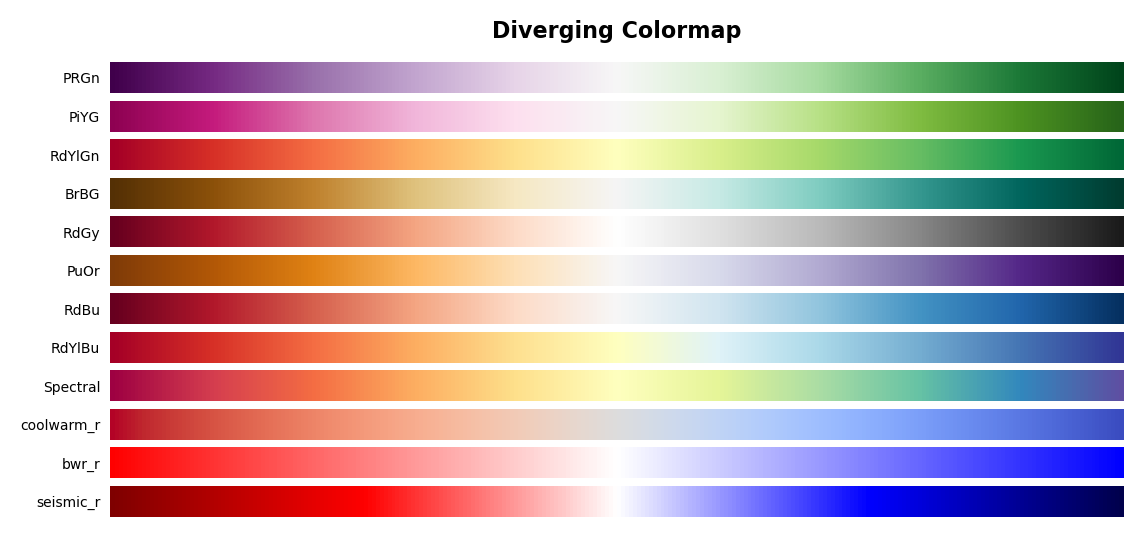

In [19]:
# _r mean reverse
diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

### Qualitative Colormap

A palette of independent colors, often used for categorical variables.

It is recommended to organize up to 10 colors, and to group more and smaller categories with other.

Repeating colors can be confusing, so try to avoid overlapping as much as possible. It's a good idea to change color to color rather than saturation and brightness.

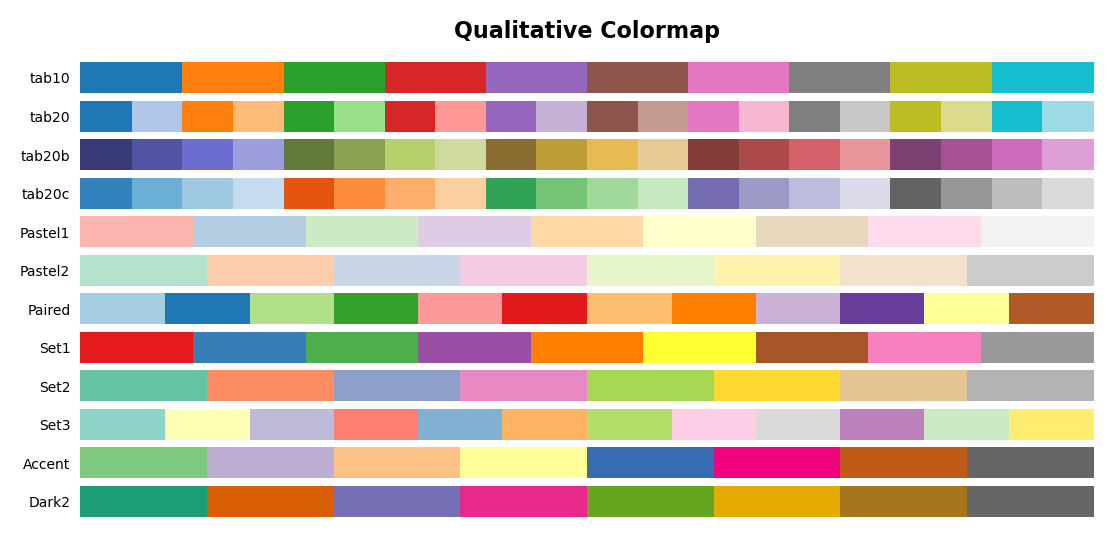

In [20]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired',
         'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )

cmap_plot(qualitative_cmap, 'Qualitative')

### Sequential Colormap

This palette is appropriate for variables with numbers or sorted values.

Used a lot in comparison of figures. Especially effective for expressing density. Take advantage of map graphs for better visualization.

Similar to diverging, but with a slightly different part because each endpoint is a color criterion, not the median. It usually indicates that light values are dark on dark backgrounds and dark values on light backgrounds.

It is recommended to use a single hue for the color.

Like diverging, it can also be used in discrete form.

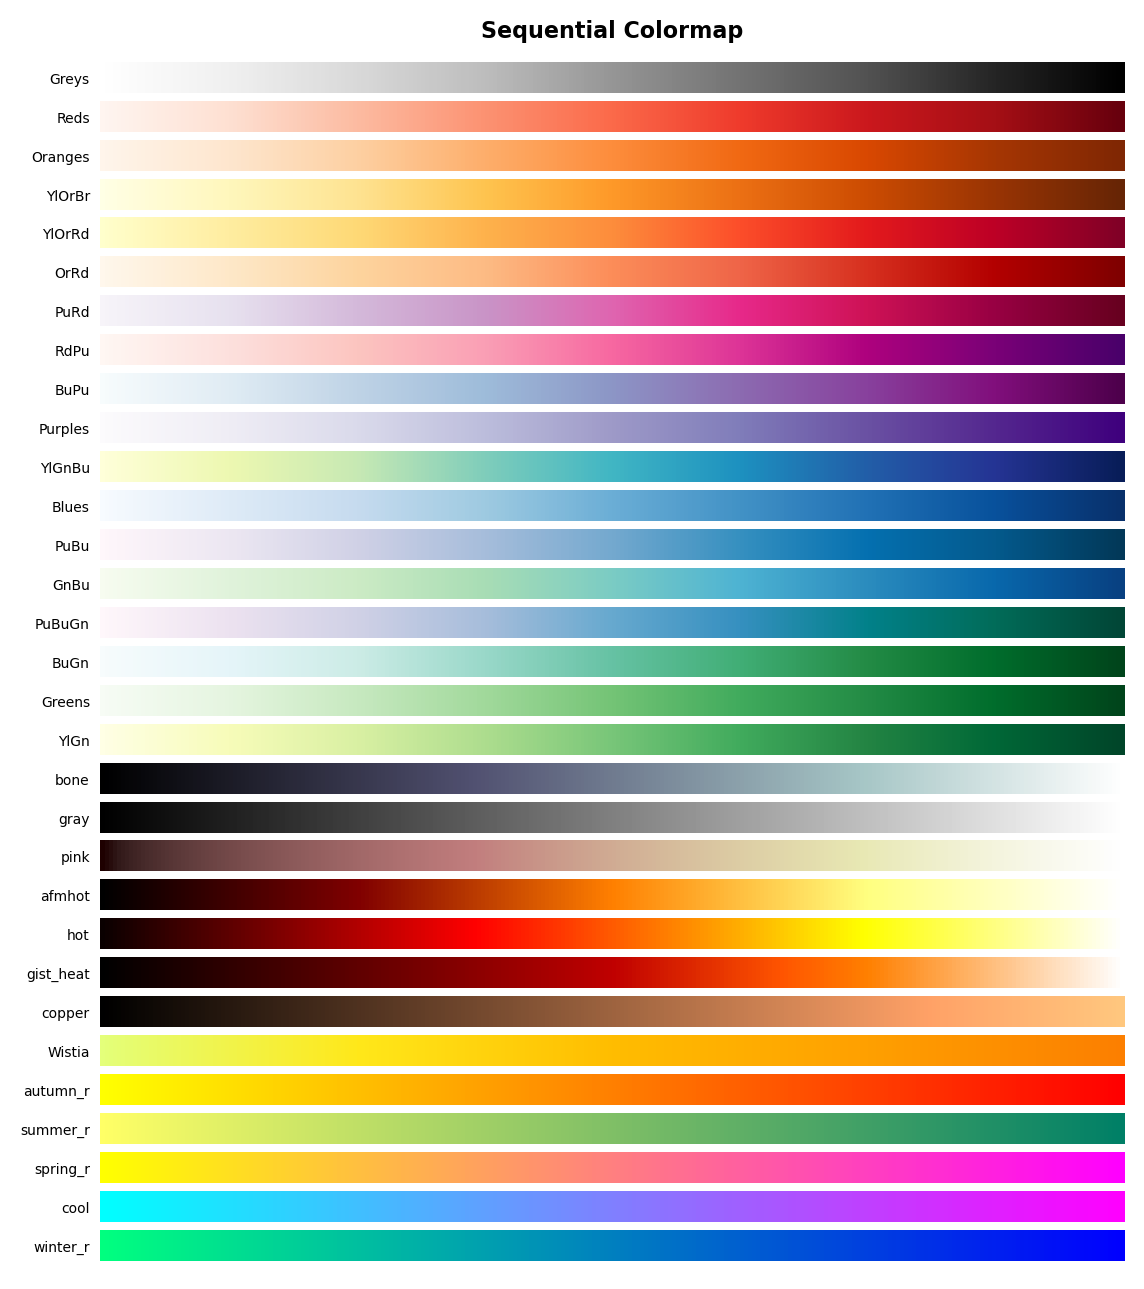

In [21]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
                     'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                     'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
                     'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
                     'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

It can be used to give a gradual feeling or to check the emphasis of a particular part.

The following visualizations are possible:

In [22]:
netflix_date = netflix_titles[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

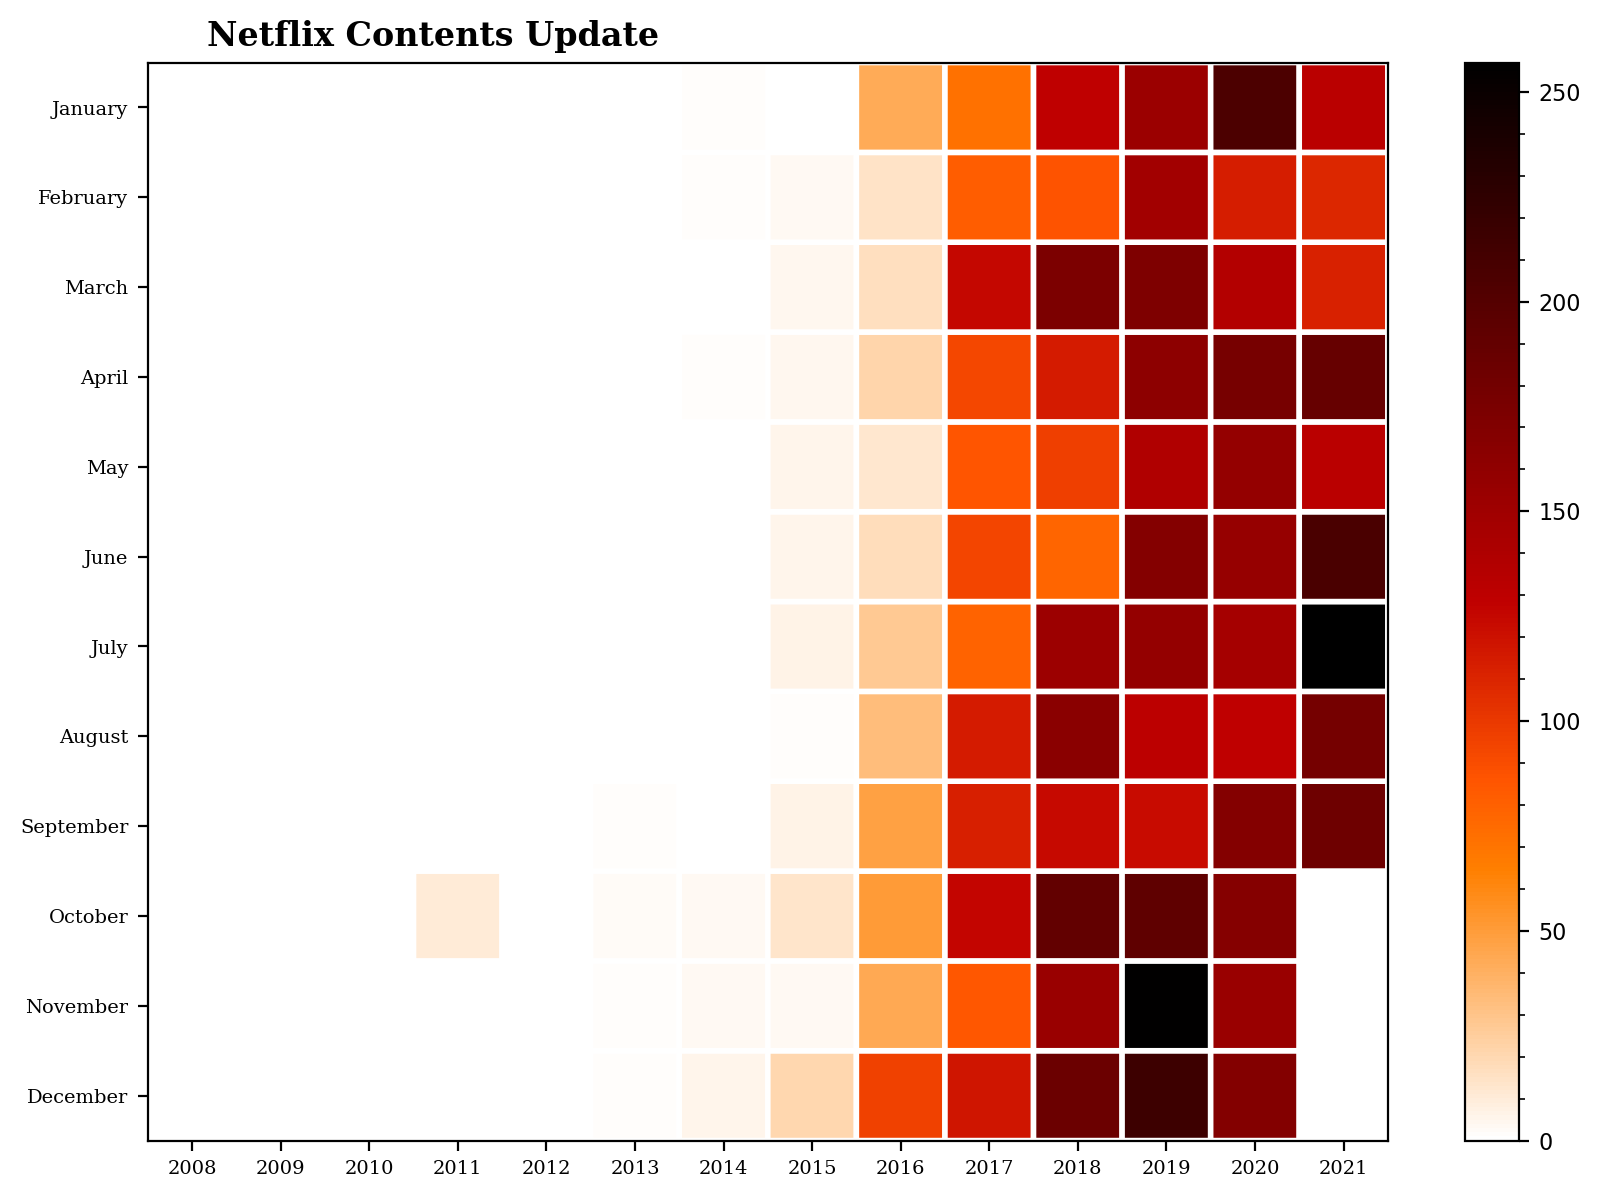

In [23]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### Scientific Colormap

it's used a lot in scientific visualization. It is used as a basic colormap of plotly and has high utilization and relatively professional feel.


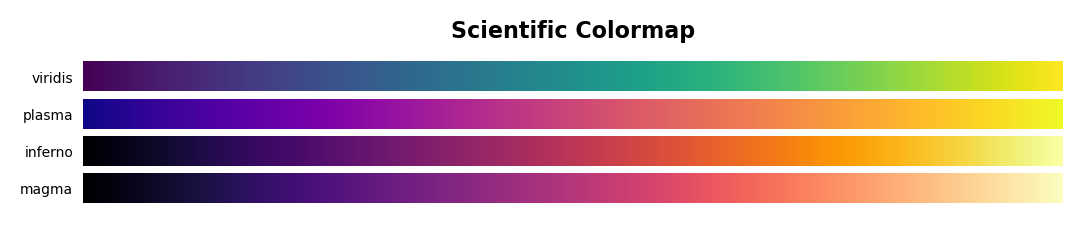

In [24]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

## 3. Text & Annotate & Patch
Many people often end up with just a picture in the graph, but the detail of the graph comes from the description. Just putting text on a specific part can change the feel of the graph.

ax.text and ax.annotate are almost similar, but each has a different purpose.

In ax.text, The first two numbers represent the ratio coordinates in the graph.

In ax.annotate, xy represent the coordinates in the graph.

va, ha is a parameter that determines whether the current coordinate is the center of the text or the left / right of the text.

color stands for color, and you can enter a custom color or rgb value directly.

bbox sets an element for the box that wraps the text.

Internal color (facecolor) and edge color(edgecolor) can be set separately.

You can adjust the space by setting padding like in html.

You can use the boxstyle to adjust the end of the rectangle.

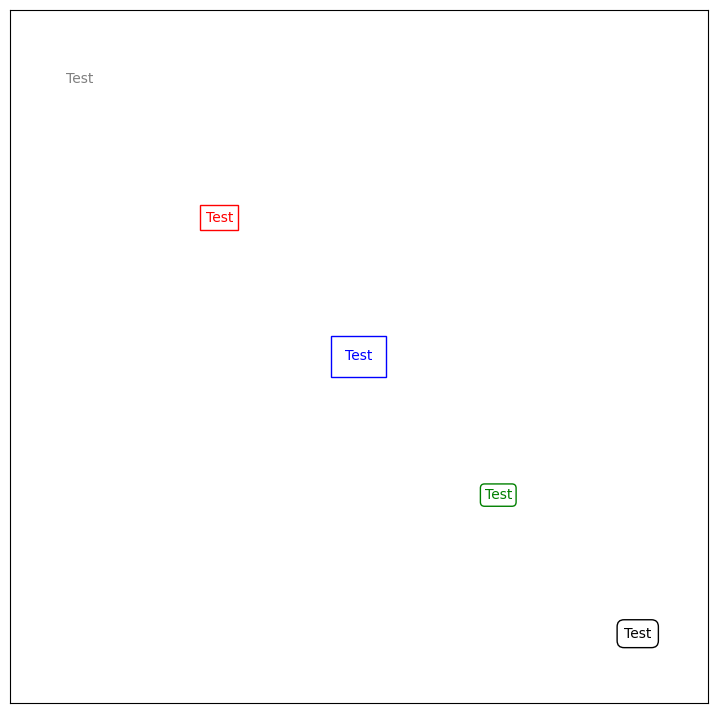

In [26]:
fig, ax = plt.subplots(figsize=(9, 9), dpi=100)

## Gray Box
ax.text(0.1, 0.9, 'Test', color='gray', va="center", ha="center")

## Red Box
ax.text(0.3, 0.7, 'Test', color='red', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='red'))

## Blue Box
ax.text(0.5, 0.5, 'Test', color='blue', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))

# Green Box
ax.text(0.7, 0.3, 'Test', color='green', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))

# Black
ax.text(0.9, 0.1, 'Test', color='black', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round, pad=0.5'))

ax.set_xticks([])
ax.set_yticks([])

plt.show()

Using a patch with text is more effective.

Except for path patches, they are provided by default, so you can use them well.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17264\2191288224.py:34: MatplotlibDeprecationWarning: Passing the radius parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)


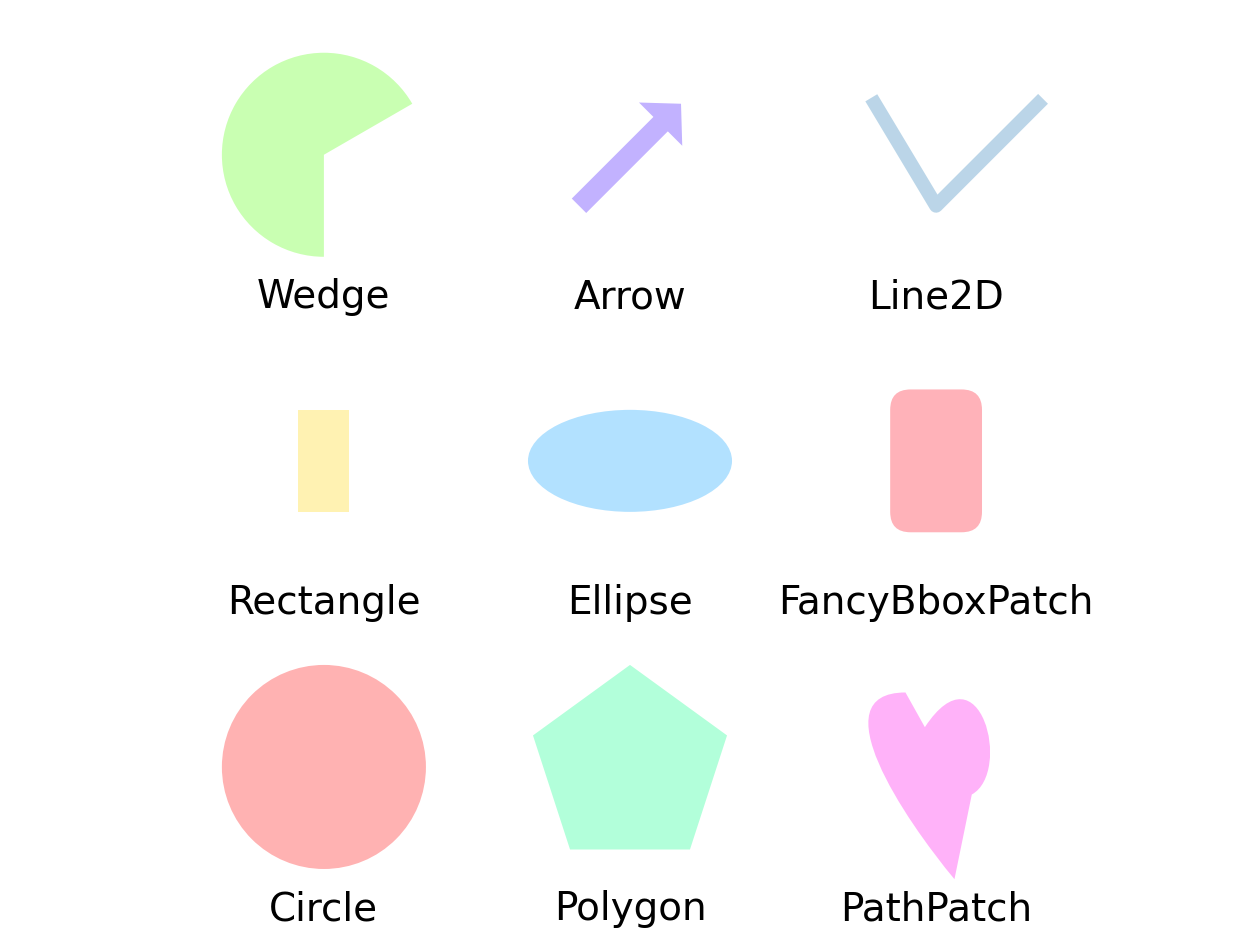

In [27]:
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

## 4. Details & Examples

In the plot you can make various settings.

Of course, adding the text or annotate mentioned above is a good idea.

### You can set the following details:

- Horizontal and Vertical (barplot)

- Border(edge) color and thickness

- Main Color & Sub Color

- Transparency

- Span

### Font Weight, Color, Family, Size ...

I usually set the details in font weight and size. It is good because it is easy to see just by setting it to bold. Also, if the size of the text is too big or too small, the proportions are strange.

The fonts do not vary, but the difference between serifs and sans serifs can make a difference.

The Tex syntax is also applicable, so use that as well.

* keyword : fontsize, color, fontweight, fontfamily

### Horizontal keyboard & Vertical (barplot)

In general, when the number of x-axes is large, the readability of the barplot is significantly lower.

For example, seaborn's countplot often overlaps the x-axis and often makes it less readable.

This is due to the fact that in a notebook environment, the width is the length of the monitor.

So in this case, you can place the graph vertically so that the axes are well read and the graph is easier to read.

### Border(Edge) Color & Thickness (Width)

The point is to make the graph more readable by drawing separate borders than simply drawing the graph.

There are many examples of drawing the borders of graphs in R notebooks, so it's good to refer to those parts as well.

Borders are a good tool because people focus on color, shape, and contrast.

The border lines should be solid color or the main color series of the graph, and it is better to make the distinction by adjusting the transparency or brightness.

### Main Color & Sub Color

If you draw a plot of seaborn, it is displayed in various colors by default. You can draw various colorful graphs while changing the palette.

But basically, the visualization should focus on information, so it's not always nice to have a colorful plot.

Rather, think about what data you want to focus on. It is better to make a difference between the main color with strong color and the sub color of achromatic color system.

Alternatively, it is a good idea to choose the palette according to the application mentioned above.

In the case of a colormap, you can select a palette or pass it to a list, so it is convenient to pass it to a list when highlighting a specific part.

### Transparency

Scatter plots also contain important points with many overlapping points. That's why it's important to know the overlapping data by adjusting transparency.

When comparing lineplots or barplots, placing two or more plots together using transparency allows you to hold comparison information.

If you add transparency to the graph, you can complete the graph with refined colors.

alpha : Parameter name of normal transparency setting

### Span
Good division is enough to give points. Zoning can be added for a variety of reasons, depending on the content or to classify units.

- axvspan : vertical span
- axhspan : horizontal span
you can set color, alpha(transparency), range, etc

In [29]:
# preprocessing
sns.set_style('whitegrid') # plot with grid

movie = netflix_titles[netflix_titles['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]    

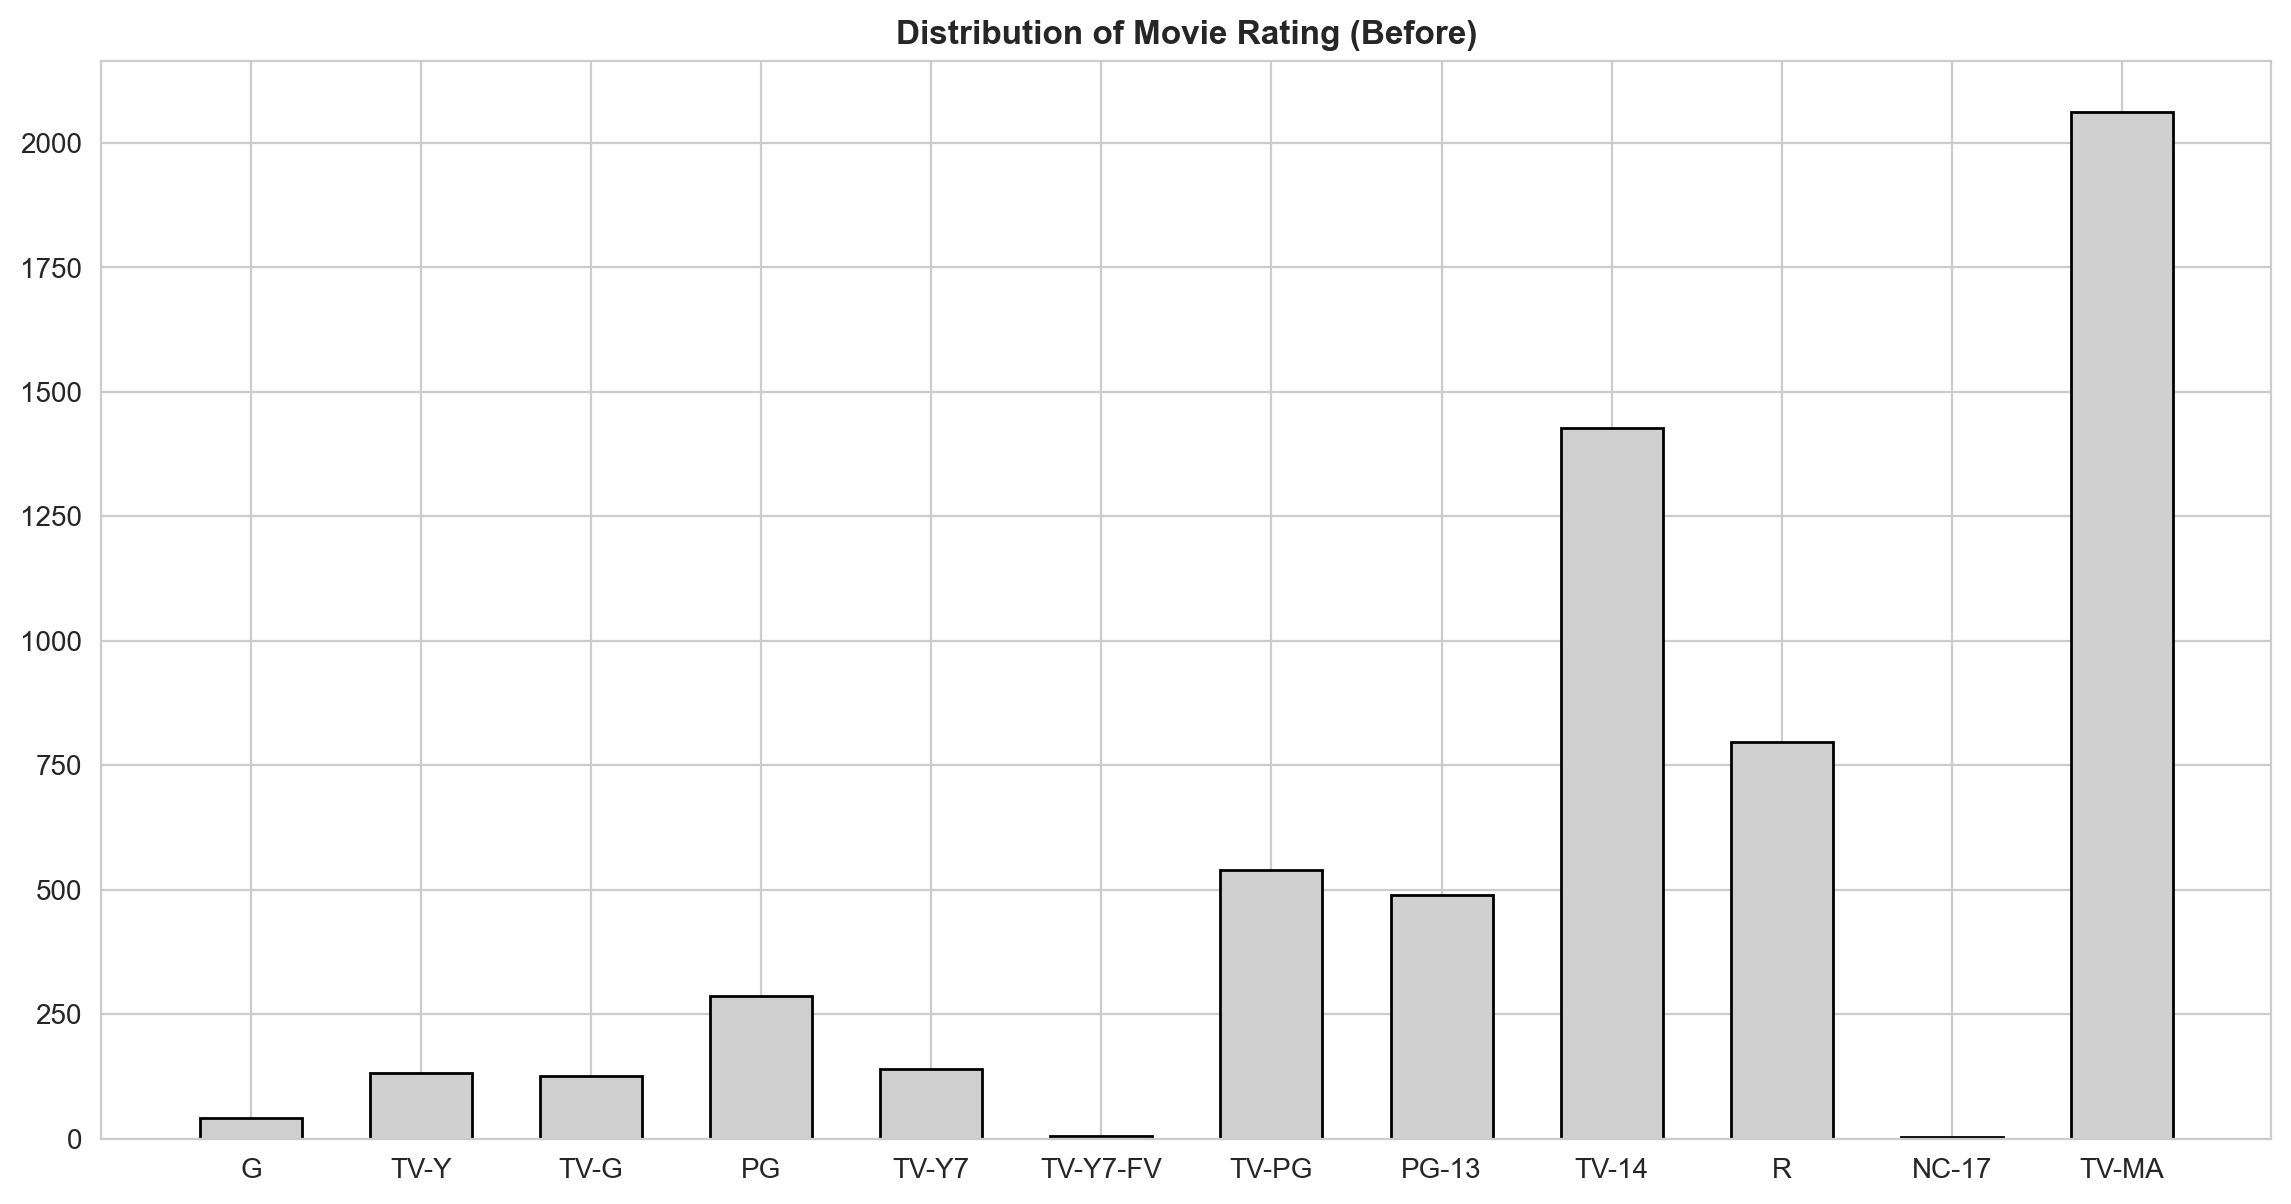

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Rating (Before)', fontweight='bold')
plt.show()

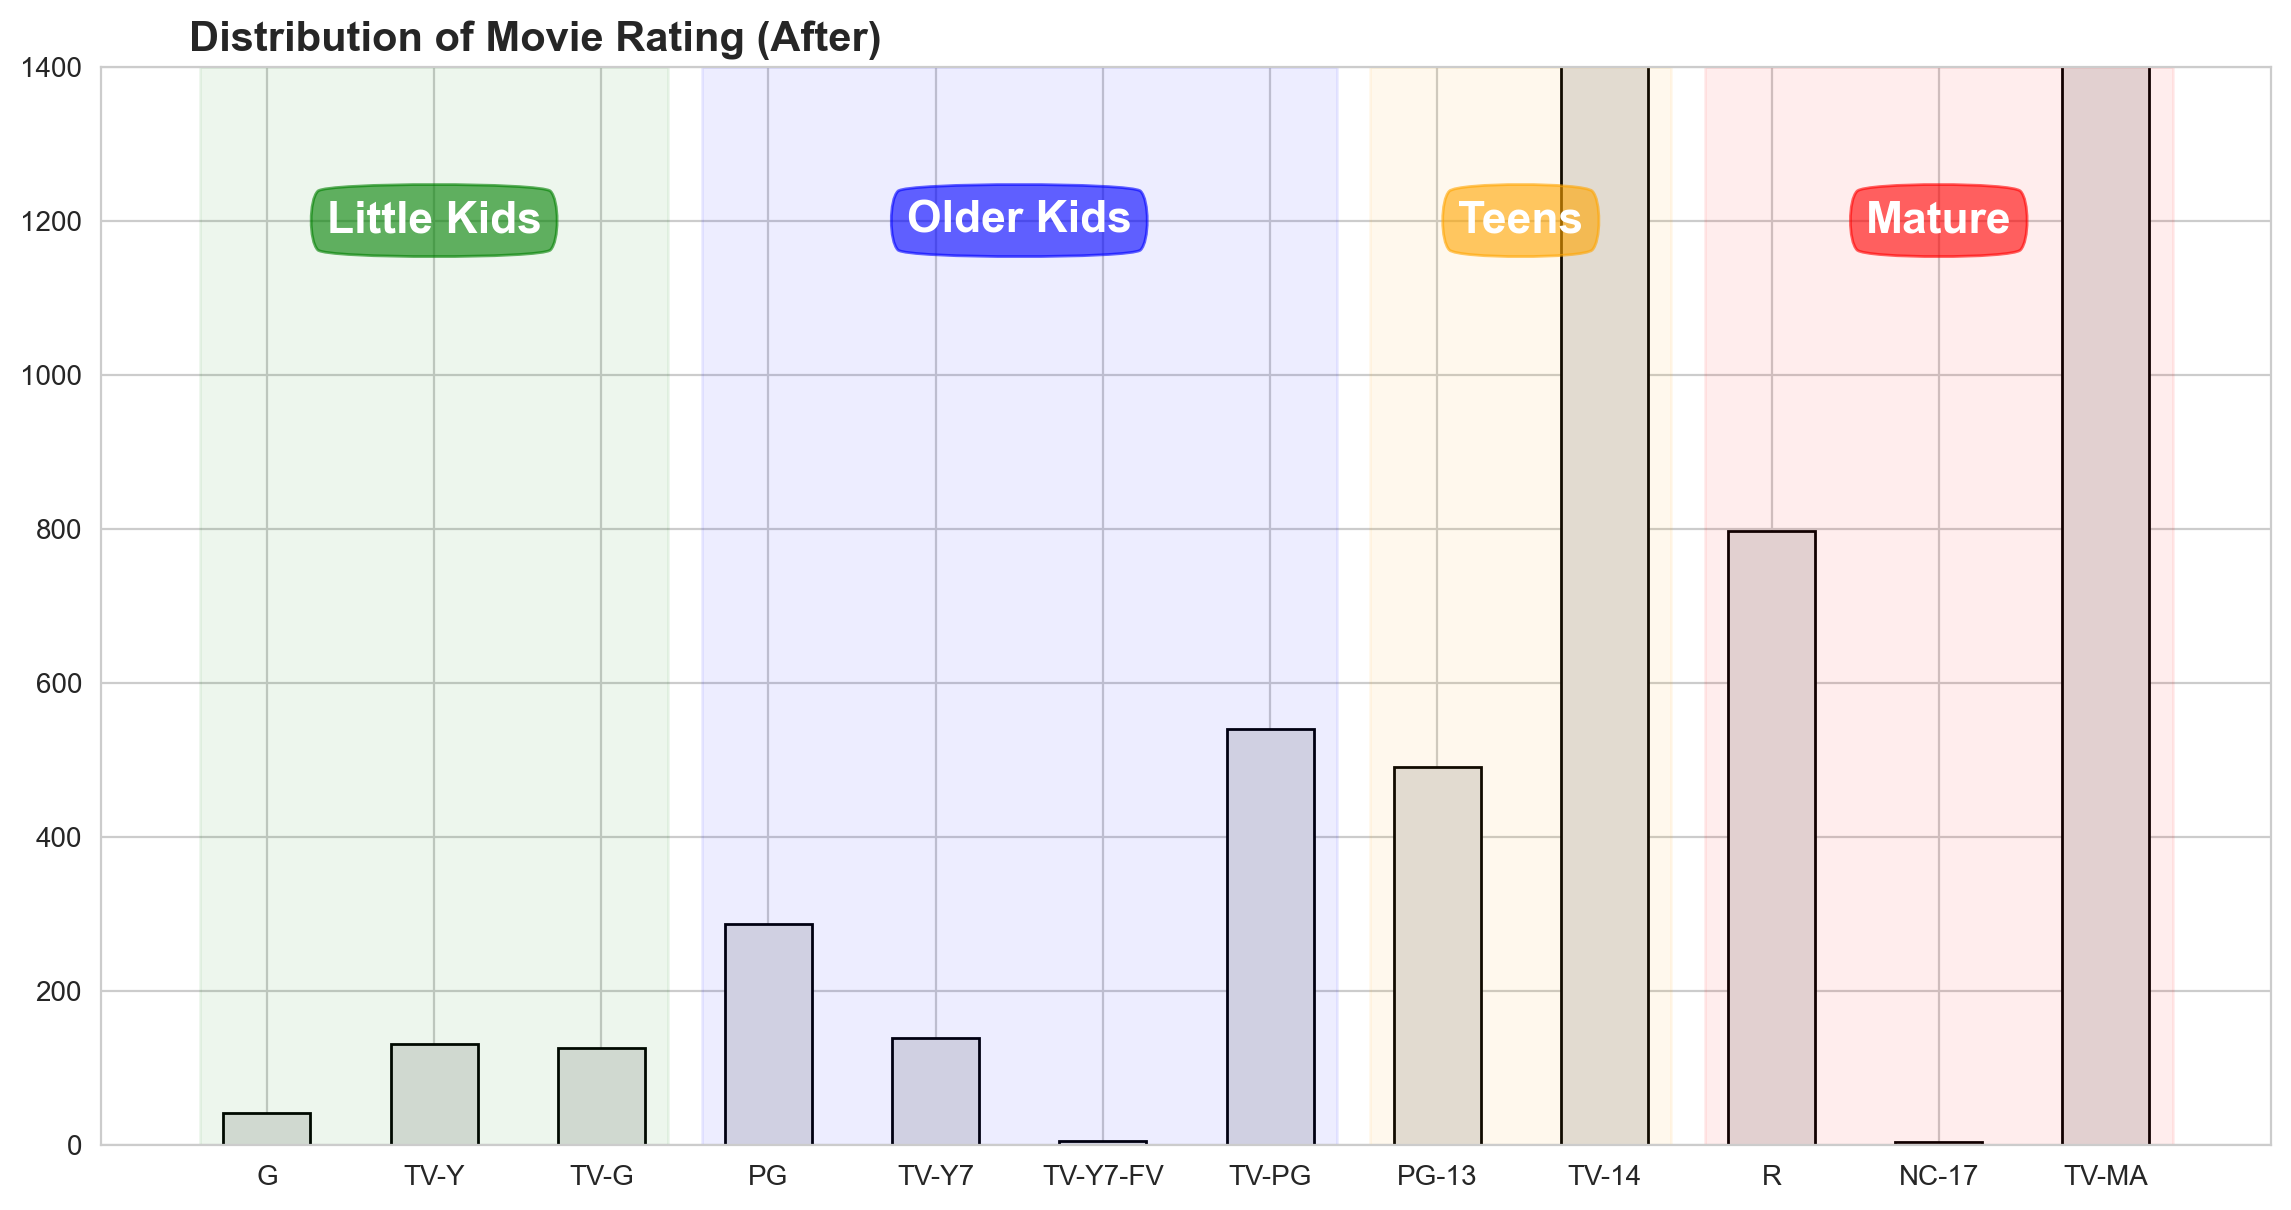

In [31]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()
    


rating_barplot(movie_rating,'Movie', 1200, 1400)